In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# Load the dataset
df = pd.read_csv("customer_segmetation.csv")

# Display first few rows
df.head()


,Age,Income,Frequency,Spending
0,67,124670,1.0,2%
1,22,150773,1.0,2%
2,49,89210,0.0,4%
3,45,171565,1.0,3%
4,53,149031,1.0,3%


In [3]:
# First, check the data types
print(df.dtypes)

# Optional: View unique values in each column
for col in df.columns:
    print(f"\n{col} unique values:\n", df[col].unique())

# Let's say 'Spending' column has values like '25%' — we remove the '%' and convert to float
df['Spending'] = df['Spending'].str.replace('%', '').astype(float)

# Now pick the relevant features again
features = ['Age', 'Income', 'Frequency', 'Spending']
X = df[features]

# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Age            int64
Income         int64
Frequency    float64
Spending      object
dtype: object

Age unique values:
 [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59 73 72 76 71 18]

Income unique values:
 [124670 150773  89210 ...  86400  97968  68416]

Frequency unique values:
 [ 1.  0.  2. nan]

Spending unique values:
 ['2%' '4%' '3%']


In [4]:
# Handle NaNs and Scale the Data
from sklearn.preprocessing import StandardScaler

# Fill missing values with column mean
X_clean = X.fillna(X.mean())

# Scale the cleaned data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)


In [5]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


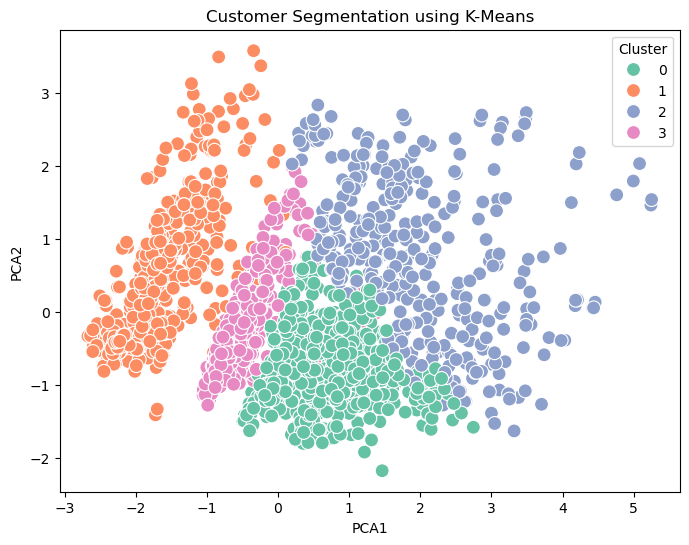

In [6]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Customer Segmentation using K-Means')
plt.show()


In [7]:
# Analyze clusters
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)


               Age         Income  Frequency  Spending
Cluster                                               
0        30.423510  123428.602254   1.083871  2.529791
1        35.131796   88153.196046   0.004942  3.960461
2        49.858247  169404.020619   1.422680  2.605670
3        31.914062  118204.635417   1.020833  4.000000
